## OVERVIEW

Microsoft is venturing into the film industry by establishing a new movie studio. With limited knowledge about creating movies, Microsoft aims to gain insights into the types of films that are currently succeeding at the box office. By analyzing the prevailing trends and success factors in the film industry, Microsoft aims to make informed decisions that will guide their film creation process. This exploration is crucial for Microsoft to thrive in the highly competitive market by aligning their strategies with the evolving landscape of the film industry.

## PROBLEM STATEMENT
Microsoft's new movie studio lacks the necessary knowledge and understanding of the film industry to make informed decisions about the types of films to create. This knowledge gap hinders their ability to compete with established companies in producing successful and engaging original content. There is a need for actionable insights into current box office trends and success factors to guide Microsoft's decision-making process and ensure their success in the highly competitive film market.

## MAIN OBJECTIVE
The main objective is to provide Microsoft's new movie studio with actionable insights into current box office trends and success factors in the film industry, enabling them to make informed decisions about the types of films to create and compete effectively with other established companies producing original video content.

## SPECIFIC OBJECTIVES
1. Which studio produces the highest grossing movies. 
2. Find the average runtime of movies and what would be the reccomended runtime for movies to be produced in the studio.
3. What is the relationship between the movie budget and the gross income generated?
4. which is the most preferred original language of a movie.
5. Find the genres with the highest and lowest ratings.

### OBJECTIVE 1: Which studio produces the highest grossing movies. 

In [93]:
#imports
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


Loading the 'bom.movie_gross.csv.gz' dataset for Gross analysis

In [31]:
bom_movie_df = pd.read_csv('bom.movie_gross.csv.gz')
bom_movie_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


Understanding the dataset better

In [32]:
bom_movie_df.shape

(3387, 5)

In [33]:
bom_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


## DATA CLEANING

### CHECKING AND DELETING DUPLICATES

In [34]:
bom_movie_df.duplicated().sum()

0

Found that there are no duplicate cells

### DROPPING OF NULL VALLUES IN OUR DATASET

From the information (.info()) of our dataset we have some few null values from studio, domestic_gross and foreign_gross columns. 
The amount of null values are minimal hence to be dropped as it won't affect our sample dataset

In [35]:
bom_movie_df.dropna(subset=['studio','domestic_gross','foreign_gross'], inplace=True)
bom_movie_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


Changed the datatypes of foreign_gross for uniformity with domestic_gross

In [38]:
bom_movie_df['foreign_gross'] = pd.to_numeric(bom_movie_df['foreign_gross'], errors='coerce')
bom_movie_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000.0,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018
3309,Time Freak,Grindstone,10000.0,256000.0,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018


Creating a new column (Total_gross) which will be by adding domestic_gross and foreign_gross

In [39]:
bom_movie_df['Total_gross'] = bom_movie_df['domestic_gross'] + bom_movie_df['foreign_gross']
bom_movie_df

,title,studio,domestic_gross,foreign_gross,year,Total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000.0,2018,1.501400e+06
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018,9.540000e+05
3309,Time Freak,Grindstone,10000.0,256000.0,2018,2.660000e+05
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018,9.840000e+04


In [40]:
bom_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2002 non-null   float64
 4   year            2007 non-null   int64  
 5   Total_gross     2002 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 109.8+ KB


In [41]:
bom_movie_df.describe()

,domestic_gross,foreign_gross,year,Total_gross
count,2.007000e+03,2.002000e+03,2007.000000,2.002000e+03
mean,4.701984e+07,7.597967e+07,2013.506228,1.216950e+08
std,8.162689e+07,1.383001e+08,2.597997,2.062245e+08
min,4.000000e+02,6.000000e+02,2010.000000,4.900000e+03
25%,6.700000e+05,4.000000e+06,2011.000000,8.155750e+06
50%,1.670000e+07,1.960000e+07,2013.000000,4.220000e+07
75%,5.605000e+07,7.645000e+07,2016.000000,1.327750e+08
max,9.367000e+08,9.605000e+08,2018.000000,1.518900e+09


In [43]:
# grouping the dataset by the studio, and calculate the mean of the total income for the films produced
columns = ['studio', 'Total_gross']
bom_movie_df = bom_movie_df.groupby('studio')['Total_gross'].mean()
bom_movie_df = bom_movie_df.reset_index()
bom_movie_df

,studio,Total_gross
0,3D,1.600000e+07
1,A24,2.625889e+07
2,AF,2.327500e+06
3,AGF,1.768000e+05
4,AR,5.805000e+07
...,...,...
167,WOW,4.940000e+04
168,Wein.,5.936091e+07
169,Yash,4.920575e+07
170,Zee,1.671000e+06


In [45]:
# sorting the sum of the total gross income from the largest gross
bom_movie_df = bom_movie_df.sort_values('Total_gross', ascending=False)
# select the top 15 studios
bom_df1 =bom_movie_df.head(15)

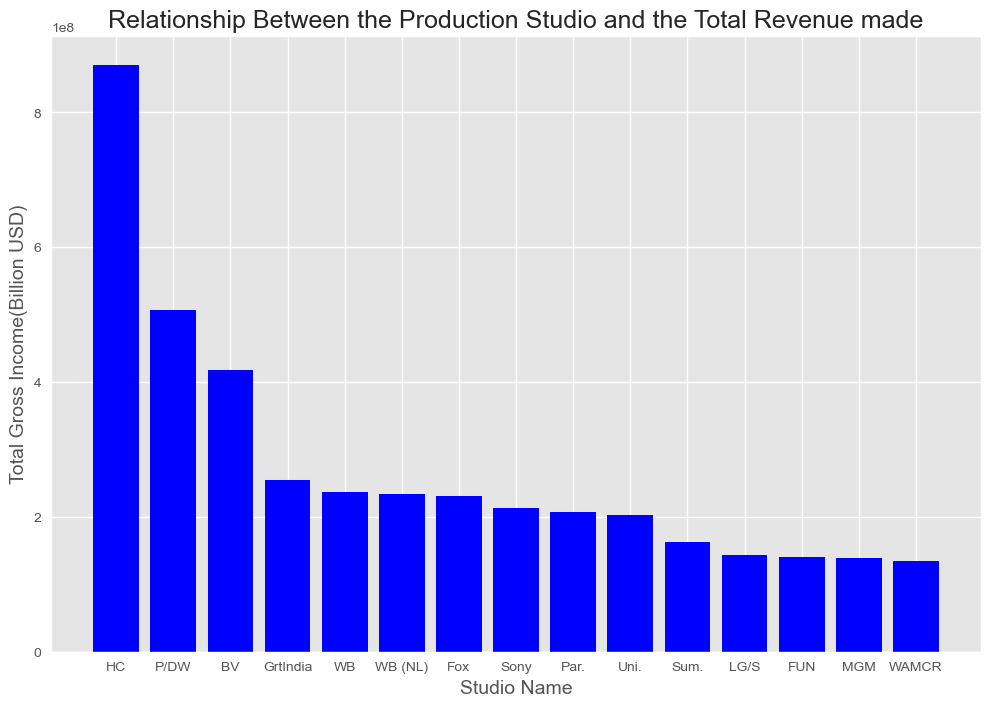

In [167]:
# plotting a barplot for the top 15 films in box office movies and the studio of production
fig, ax = plt.subplots(figsize=(12,8))

plt.style.use('ggplot')
plt.bar( x= bom_df1['studio'], height= bom_df1['Total_gross'], color = 'blue')

plt.xlabel('Studio Name', fontsize=14)
plt.ylabel('Total Gross Income(Billion USD)', fontsize=14)
plt.title('Relationship Between the Production Studio and the Total Revenue made', fontsize=18)
plt.show()

From the above plot we can see that the top 5 Total grossing studios are HC, P/DW, BV, GrtIndia, and WB.

### OBJECTIVE 2: Find the average runtime of movies and what would be the reccomended runtime for movies to be produces in the studio.

In [80]:
movie_info_df = pd.read_csv('rt.movie_info.tsv.gz', delimiter = '\t')
movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [81]:
#checking how our dataset looks like
movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


From the information above we can see that the runtime column has some 30 missing values which is not big to affect our dataset after replacing the null values with '0'.
It can also be seen that datatype is a string and needs to be changed to a numerical value so as to cater for mathematical computations


In [82]:
#REMOVE THE WORD MINUTES from the runtime column

movie_info_df['runtime'] = movie_info_df['runtime'].str.replace('minutes', '')
movie_info_df.head()


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200,NaN


In [83]:
#Replacing the null values in runtime column with 0
movie_info_df['runtime']= movie_info_df['runtime'].fillna(0)
movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1560 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [84]:
#converting the result to number values that will be recognized by the computer for computation.
# use a .describe() method to get the mean and percentiles of our interest.

movie_info_df['runtime']= pd.to_numeric(movie_info_df.runtime,errors="coerce")
movie_info_df['runtime'].describe()

count    1560.000000
mean      101.968590
std        28.276622
min         0.000000
25%        90.000000
50%       100.000000
75%       114.000000
max       358.000000
Name: runtime, dtype: float64

In [86]:
#finding the average length of a movie
movie_info_df['runtime'].mean()

101.96858974358975

Based on the analysis conducted, it can be concluded that the average movie length is approximately 101 minutes, ranging from a minimum of 5 minutes to a maximum of 358 minutes. The decision to use the 75th percentile as the average is based on the preference for longer movies, taking into consideration the potential influence of shorter films on the mean calculation. This choice is supported by personal intuition and experience with movie viewing, as longer movies are generally perceived as more engaging and fulfilling compared to shorter ones.

### OBJECTIVE 3: What is the relationship between the movie budget and the gross income generated?

At this stage I am trying to analyse the relationship between movie production cost and its total icome generated.

In [88]:
#Loading the dataset
budgets_df = pd.read_csv("tn.movie_budgets.csv.gz")
budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [89]:
#Description information of how our dataset looks like
budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [94]:
#Our two important columns are objects, we convert them to number values, float, and remove the dollar sign for easier mathematical computation
budgets_df['production_budget'] = budgets_df['production_budget'].astype(str)
budgets_df['worldwide_gross'] = budgets_df['worldwide_gross'].astype(str)

budgets_df['production_budget'] = budgets_df['production_budget'].str.replace('$', '').str.replace(',', '')
budgets_df['worldwide_gross'] = budgets_df['worldwide_gross'].str.replace('$', '').str.replace(',', '')

budgets_df['production_budget'] = budgets_df['production_budget'].astype(float)
budgets_df['worldwide_gross'] = budgets_df['worldwide_gross'].astype(float)

budgets_df.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,"$760,507,625",2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875",1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,"$42,762,350",1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,"$459,005,868",1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,"$620,181,382",1.316722e+09


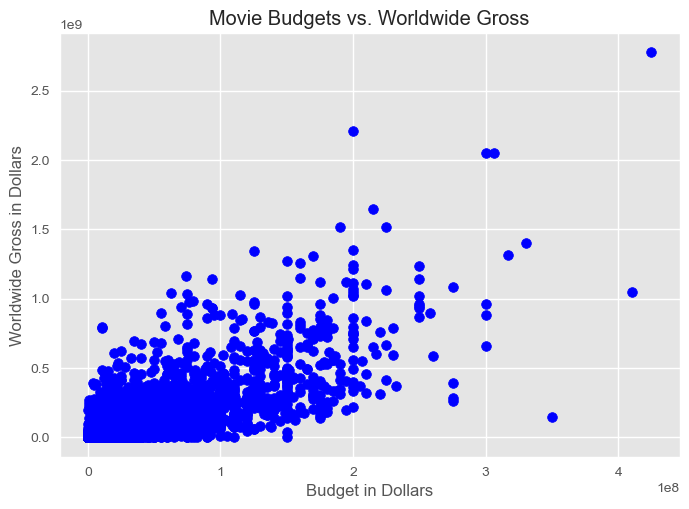

In [165]:
#Plotting a scatter plot to show the relationship
plt.scatter(budgets_df['production_budget'], budgets_df['worldwide_gross'], color='blue')


plt.xlabel('Budget in Dollars')
plt.ylabel('Worldwide Gross in Dollars')
plt.title('Movie Budgets vs. Worldwide Gross')


plt.show()

The Scatter plot reveals a moderately positive correlation between the gross income and the budget of a movie, suggesting that an increase in budget tends to result in a higher gross income. This positive relationship implies that by utilizing the insights from our analysis and assembling the appropriate resources, we can potentially gain a competitive edge in our investments and achieve profitability.

### OBJECTIVE 4: which is the most preferred original language of a movie.

In [110]:
#loading the dataset
tmdb_df = pd.read_csv('tmdb.movies.csv.gz', index_col=0)
tmdb_df

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [111]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [112]:
tmdb_df['original_language'].value_counts()

en    23291
fr      507
es      455
ru      298
ja      265
      ...  
bo        1
si        1
sl        1
hz        1
dz        1
Name: original_language, Length: 76, dtype: int64

It can be seen that most movies released, their original language was english.

This is also so since English is the most prefered universal language.

### OBJECTIVE 5: Find the genres with the higest and lowest ratings.

In [133]:
movie_df1 = pd.read_csv('imdb.title.basics.csv.gz')
movie_df1

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [151]:
movie_df2 = pd.read_csv('imdb.title.ratings.csv.gz')
movie_df2


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [152]:
# Perform the join operation based on a common column
joined_df = pd.merge(movie_df1, movie_df2, on='tconst')
joined_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


In [153]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [154]:
joined_df.dropna(inplace=True)
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65720 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           65720 non-null  object 
 1   primary_title    65720 non-null  object 
 2   original_title   65720 non-null  object 
 3   start_year       65720 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   genres           65720 non-null  object 
 6   averagerating    65720 non-null  float64
 7   numvotes         65720 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


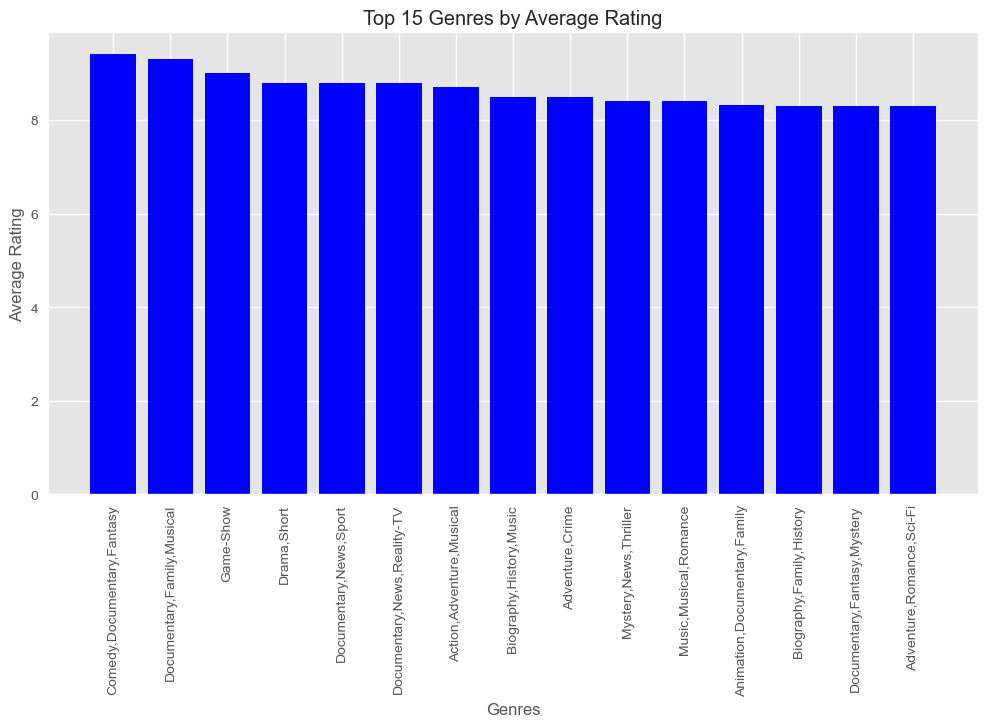

In [161]:
# Identifying the best performing genres by rating
genre_ratings = joined_df.groupby('genres')['averagerating'].mean().sort_values(ascending=False)

# Select the top 15 genres
top_genres = genre_ratings.head(15)

# Plotting the bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_genres.index, top_genres.values, color='blue')
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.title('Top 15 Genres by Average Rating')
plt.xticks(rotation=90)
plt.show()

The above bar plot represents the different types or genres of films and their corresponding ratings. We see that the most highly rated genres include Science Fiction & Fantasy, Action & Adventure, Kids & family, Comedy, Documentaries among other highly rated genres.

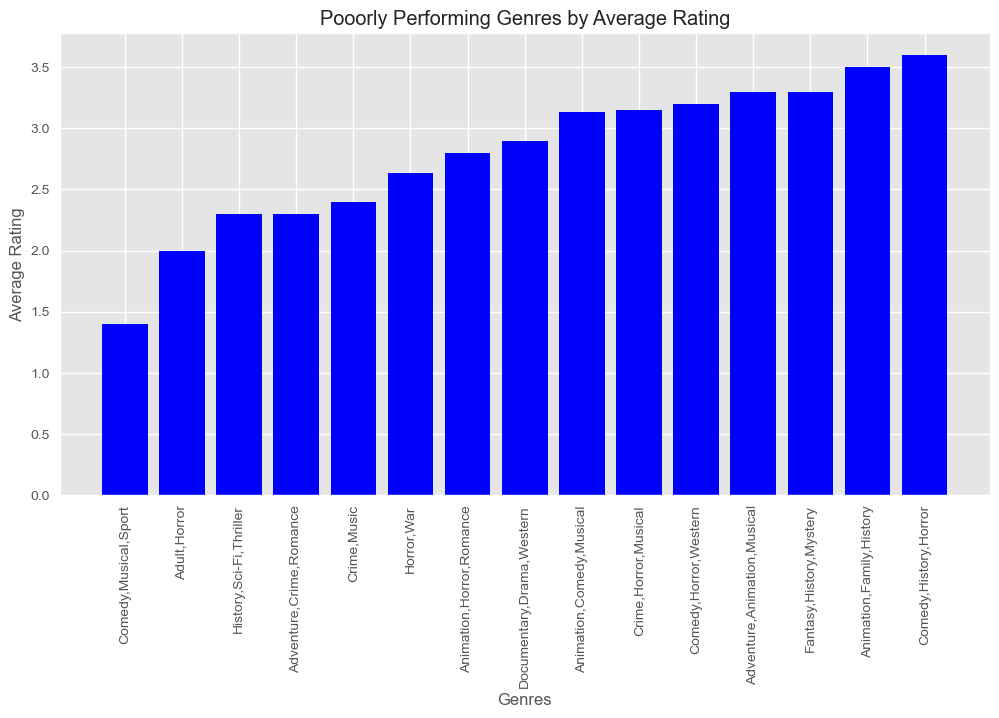

In [168]:
# Identifying the poorly performing genres by rating
genre_ratings = joined_df.groupby('genres')['averagerating'].mean().sort_values(ascending=True)

# Select the bottom 15 genres
Bottom_genres = genre_ratings.head(15)

# Plotting the bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_genres.index, top_genres.values, color='blue')
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.title('Pooorly Performing Genres by Average Rating')
plt.xticks(rotation=90)
plt.show()

The above bar plot represents the poorly performing genres by rating. We see that the poorly rated genres include Horror, History, Romance, War among other poorly rated genres.

## CONCLUSION
After analyzing the data obtained from various sources such as the TMDB dataset, BOM movies, reviews, and movie budgets, several insights were identified to guide Microsoft's decision-making process for creating successful films. The analysis showed that the most successful genres by ratings were action, adventure,comedy, science fiction and Documentaries. The analysis also highlighted the importance of having a high production budget for successful films. These findings provide actionable insights to guide Microsoft's new movie studio in creating successful films and competing in the highly competitive movie industry.

## RECOMMENDATIONS
When coming up with the new Microsoft movie studios I would recommend that:
1. They should strive and work closely or partner with the highest grossing companies in the industry as they could borrow on some of their planning and execution of projets for better return on business.
2. The average run time of a movie being produced should be averagely 100 minutes to 120 minutes.
3. The new studio should invest heavily on their production budget of a movieand with the right resources, this will help in coming up with better movies hence having high prospects on its returns to the business.
4. The new studio shou;d focus more in producing movies with their original language being English.
5. The new studio should produce genres that attract good ratings such as Science Fiction & Fantasy, Action & Adventure, Kids & family, Comedy, Documentaries as it will lead to more viewership which translates to more returns on investment.